Notebook to create the draft versions of the ultimately chosen correlation heatmaps for the app

In [1]:
import pandas as pd

# Path to your Parquet gzip file
file_path_11 = '../../1_Data/CLEANED/interventions_dataset.parquet'

# Read the Parquet file into a pandas DataFrame
interventions_dataset = pd.read_parquet(file_path_11, engine='pyarrow')

In [2]:
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt

# Assuming df_interventions1 is your DataFrame
selected_columns = ['vector_type', 'eventtype_trip', 'eventlevel_trip', 'province_intervention', 'abandon_reason']

# Selecting the relevant columns
df_selected = interventions_dataset[selected_columns]

# Handling missing values (if any)
#df_selected.fillna('Unknown', inplace=True)

# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df_selected)

# Calculating the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap using Plotly
heatmap = go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu',
    zmin=-1, zmax=1
)

# Create layout for the heatmap
layout = go.Layout(
    title='Correlation Matrix of Selected Columns',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features'),
    margin=dict(l=140, r=40, t=80, b=40),
)

# Create a Figure object
fig = go.Figure(data=[heatmap], layout=layout)

# Show the interactive plot
fig.show()

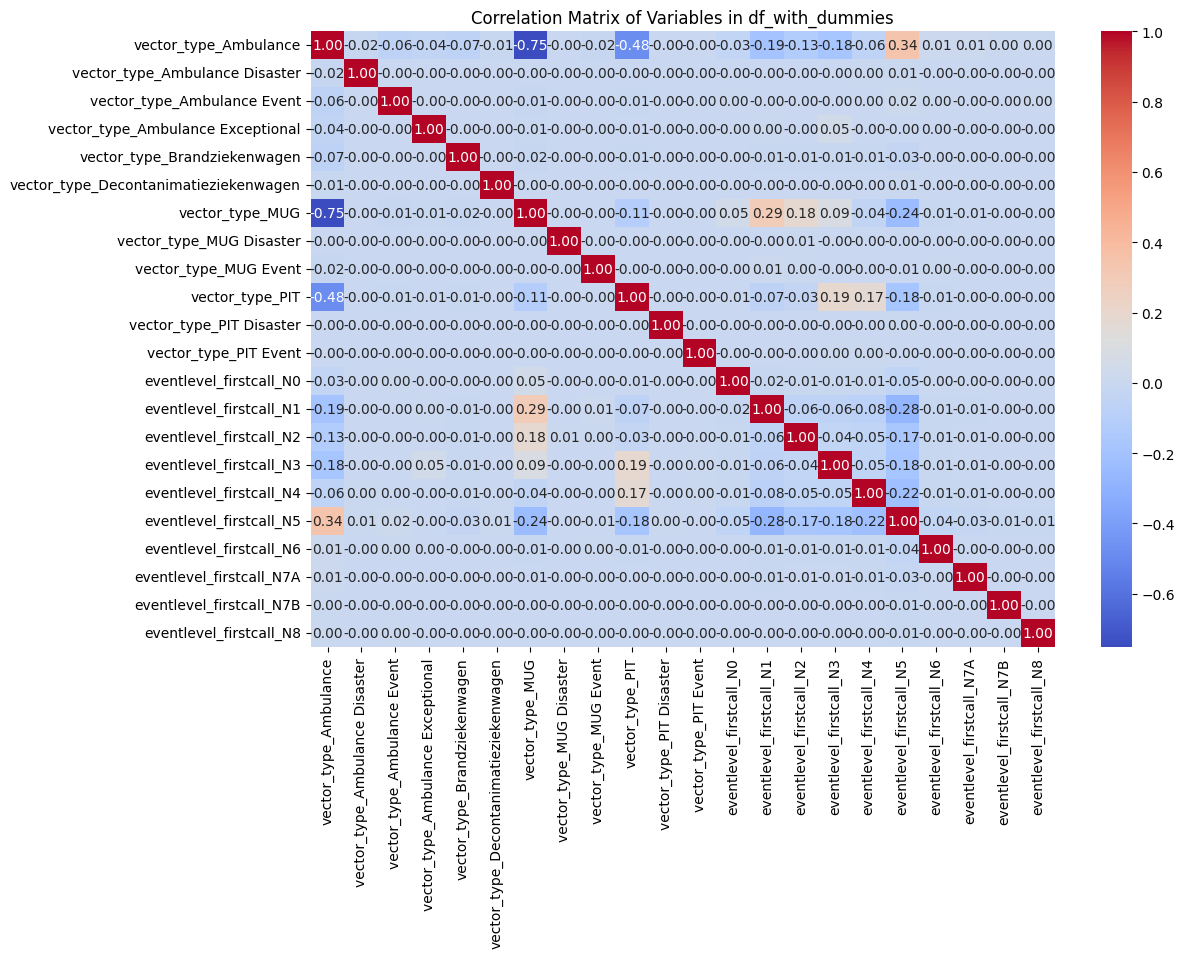

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting column vector types and event level first call
selected_columns = interventions_dataset[['vector_type', 'eventlevel_firstcall']]

# Creating dummy variables for selected columns
dummy_variables = pd.get_dummies(selected_columns)

# Concatenating the dummy variables with the original DataFrame
#df_with_dummies = pd.concat([interventions_dataset, dummy_variables], axis=1)

# Compute correlation matrix for the subset of columns
correlation_matrix = dummy_variables.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables in df_with_dummies')
plt.show()

In [4]:
import plotly.express as px
import numpy as np

# Define categorical columns for which dummy variables will be created
categorical_columns = ['vector_type','eventlevel_firstcall']

# Create dummy variables for categorical columns
interventions_dataset = pd.get_dummies(interventions_dataset, columns=categorical_columns)

# Calculate the correlation matrix
correlation_matrix = interventions_dataset.corr()

# Create an upper triangular mask
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Apply the mask to the correlation matrix
correlation_matrix_masked = correlation_matrix.mask(mask)

# Create an interactive heatmap using Plotly
fig = px.imshow(correlation_matrix_masked,
                x=correlation_matrix_masked.index,
                y=correlation_matrix_masked.columns,
                color_continuous_scale='Viridis')

# Update layout
fig.update_layout(title='Interactive Correlation Heatmap of Interventions Dataset',
                  xaxis_title='Variables',
                  yaxis_title='Variables')

# Show the plot
fig.show()

/var/folders/t3/ph8rkyks35s2z67jf7rffj9w0000gn/T/ipykernel_97537/342684810.py:11: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [5]:
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt

# Assuming df_interventions1 is your DataFrame
selected_columns = ['eventtype_firstcall', 'eventtype_trip']

# Selecting the relevant columns
df_selected = interventions_dataset[selected_columns]

# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df_selected)

# Calculating the correlation matrix
correlation_matrix = df_encoded.corr()

# Select the dummy variables of "eventtype_firstcall" on the y-axis and "eventtype_trip" on the x-axis
correlation_subset = correlation_matrix.loc[df_encoded.columns[df_encoded.columns.str.startswith('eventtype_firstcall')],
                                            df_encoded.columns[df_encoded.columns.str.startswith('eventtype_trip')]]

# Create a heatmap using Plotly
heatmap = go.Heatmap(
    z=correlation_subset.values,
    x=correlation_subset.columns,
    y=correlation_subset.index,
    colorscale='RdBu',
    zmin=-1, zmax=1
)

# Create layout for the heatmap
layout = go.Layout(
    title='Correlation Matrix between eventtype_firstcall and eventtype_trip',
    xaxis=dict(title='eventtype_trip'),
    yaxis=dict(title='eventtype_firstcall'),
    margin=dict(l=140, r=40, t=80, b=40),
)

# Create a Figure object
fig = go.Figure(data=[heatmap], layout=layout)

# Show the interactive plot
fig.show()

In [ ]:
import pandas as pd

# Path to your Parquet gzip file
file_path_11 = '../../1_Data/CLEANED/interventions_dataset.parquet'

# Read the Parquet file into a pandas DataFrame
interventions_dataset = pd.read_parquet(file_path_11, engine='pyarrow')

In [10]:
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt

# Assuming df_interventions1 is your DataFrame
selected_columns = ['vector_type', 'eventlevel_trip']

# Selecting the relevant columns
df_selected = interventions_dataset[selected_columns]

# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df_selected)

# Calculating the correlation matrix
correlation_matrix = df_encoded.corr()

# Select the dummy variables of "vector_type" on the y-axis and "eventlevel_trip" on the x-axis
correlation_subset = correlation_matrix.loc[df_encoded.columns[df_encoded.columns.str.startswith('vector_type')],
                                            df_encoded.columns[df_encoded.columns.str.startswith('eventlevel_trip')]]

# Create a heatmap using Plotly
heatmap = go.Heatmap(
    z=correlation_subset.values,
    x=correlation_subset.columns,
    y=correlation_subset.index,
    colorscale='RdBu',
    zmin=-1, zmax=1
)

# Create layout for the heatmap
layout = go.Layout(
    title='Correlation Matrix between vector_type and eventlevel_trip',
    xaxis=dict(title='eventlevel_trip'),
    yaxis=dict(title='vector_type'),
    margin=dict(l=140, r=40, t=80, b=40),
)

# Create a Figure object
fig = go.Figure(data=[heatmap], layout=layout)

# Show the interactive plot
fig.show()


In [11]:
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt

# Assuming df_interventions1 is your DataFrame
selected_columns = ['eventlevel_trip', 'eventtype_trip']

# Selecting the relevant columns
df_selected = interventions_dataset[selected_columns]

# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df_selected)

# Calculating the correlation matrix
correlation_matrix = df_encoded.corr()

# Select the dummy variables of "eventlevel_trip" on the y-axis and "eventtype_trip" on the x-axis
correlation_subset = correlation_matrix.loc[df_encoded.columns[df_encoded.columns.str.startswith('eventlevel_trip')],
                                            df_encoded.columns[df_encoded.columns.str.startswith('eventtype_trip')]]

# Create a heatmap using Plotly
heatmap = go.Heatmap(
    z=correlation_subset.values,
    x=correlation_subset.columns,
    y=correlation_subset.index,
    colorscale='RdBu',
    zmin=-1, zmax=1
)

# Create layout for the heatmap
layout = go.Layout(
    title='Correlation Matrix between eventlevel_trip and eventtype_trip',
    xaxis=dict(title='eventtype_trip'),
    yaxis=dict(title='eventlevel_trip'),
    margin=dict(l=140, r=40, t=80, b=40),
)

# Create a Figure object
fig = go.Figure(data=[heatmap], layout=layout)

# Show the interactive plot
fig.show()

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt

# Assuming df_interventions1 is your DataFrame
selected_columns = ['vector_type', 'eventtype_trip']

# Selecting the relevant columns
df_selected = interventions_dataset[selected_columns]

# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df_selected)

# Calculating the correlation matrix
correlation_matrix = df_encoded.corr()

# Select the dummy variables of "vector_type" on the y-axis and "eventtype_trip" on the x-axis
correlation_subset = correlation_matrix.loc[df_encoded.columns[df_encoded.columns.str.startswith('vector_type')],
                                            df_encoded.columns[df_encoded.columns.str.startswith('eventtype_trip')]]

# Create a heatmap using Plotly
heatmap = go.Heatmap(
    z=correlation_subset.values,
    x=correlation_subset.columns,
    y=correlation_subset.index,
    colorscale='RdBu',
    zmin=-1, zmax=1
)

# Create layout for the heatmap
layout = go.Layout(
    title='Correlation Matrix between vector_type and eventtype_trip',
    xaxis=dict(title='eventtype_trip'),
    yaxis=dict(title='vector_type'),
    margin=dict(l=140, r=40, t=80, b=40),
)

# Create a Figure object
fig = go.Figure(data=[heatmap], layout=layout)

# Show the interactive plot
fig.show()

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt

# Assuming df_interventions1 is your DataFrame
selected_columns = ['abandon_reason', 'eventtype_trip']

# Selecting the relevant columns
df_selected = interventions_dataset[selected_columns]

# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df_selected)

# Calculating the correlation matrix
correlation_matrix = df_encoded.corr()

# Select the dummy variables of "abandon_reason" on the y-axis and "eventtype_trip" on the x-axis
correlation_subset = correlation_matrix.loc[df_encoded.columns[df_encoded.columns.str.startswith('abandon_reason')],
                                            df_encoded.columns[df_encoded.columns.str.startswith('eventtype_trip')]]

# Create a heatmap using Plotly
heatmap = go.Heatmap(
    z=correlation_subset.values,
    x=correlation_subset.columns,
    y=correlation_subset.index,
    colorscale='RdBu',
    zmin=-1, zmax=1
)

# Create layout for the heatmap
layout = go.Layout(
    title='Correlation Matrix between abandon_reason and eventtype_trip',
    xaxis=dict(title='eventtype_trip'),
    yaxis=dict(title='abandon_reason'),
    margin=dict(l=140, r=40, t=80, b=40),
)

# Create a Figure object
fig = go.Figure(data=[heatmap], layout=layout)

# Show the interactive plot
fig.show()